In [1]:
from astropy.io import fits, ascii
from astropy.table import Table, hstack, vstack
from scipy.interpolate import interp1d
import numpy as np
import library as lib
import matplotlib.pyplot as plt
import glob, pdb
%matplotlib inline

In [2]:
mgrid = fits.getdata('../DEEP2/Master_Grid.fits')
mgrid.shape

(4140, 10180)

In [3]:
result = ascii.read('../cigale/pcigale/deeps/out/results.txt')
Table(result)

id,bayes.sfh.sfr,bayes.sfh.sfr_err,bayes.sfh.sfr10Myrs,bayes.sfh.sfr10Myrs_err,bayes.sfh.sfr100Myrs,bayes.sfh.sfr100Myrs_err,bayes.stellar.m_star,bayes.stellar.m_star_err,bayes.attenuation.FUV,bayes.attenuation.FUV_err,bayes.attenuation.V_B90,bayes.attenuation.V_B90_err,bayes.dust.luminosity,bayes.dust.luminosity_err,bayes.sfh.tau_main,bayes.sfh.tau_main_err,bayes.sfh.age,bayes.sfh.age_err,best.chi_square,best.reduced_chi_square,best.agn.fracAGN_dale2014,best.attenuation.Av.nebular.continuum_old,best.attenuation.Av.nebular.continuum_young,best.attenuation.Av.nebular.lines_old,best.attenuation.Av.nebular.lines_young,best.attenuation.Av.stellar.old,best.attenuation.Av.stellar.young,best.attenuation.FUV,best.attenuation.V_B90,best.attenuation.av_old_factor,best.attenuation.nebular.continuum_old,best.attenuation.nebular.continuum_young,best.attenuation.nebular.lines_old,best.attenuation.nebular.lines_young,best.attenuation.powerlaw_slope,best.attenuation.stellar.old,best.attenuation.stellar.young,best.attenuation.uv_bump_amplitude,best.attenuation.uv_bump_wavelength,best.attenuation.uv_bump_width,best.dust.alpha,best.dust.luminosity,best.nebular.f_dust,best.nebular.f_esc,best.nebular.lines_width,best.nebular.logU,best.sfh.age,best.sfh.integrated,best.sfh.sfr,best.sfh.sfr100Myrs,best.sfh.sfr10Myrs,best.sfh.tau_main,best.stellar.age_m_star,best.stellar.imf,best.stellar.lum_ly,best.stellar.lum_ly_old,best.stellar.lum_ly_young,best.stellar.m_gas,best.stellar.m_gas_old,best.stellar.m_gas_young,best.stellar.m_star,best.stellar.m_star_old,best.stellar.m_star_young,best.stellar.metallicity,best.stellar.n_ly,best.stellar.n_ly_old,best.stellar.n_ly_young,best.stellar.old_young_separation_age,best.universe.age,best.universe.luminosity_distance,best.universe.redshift,best.cfht_B,best.cfht_R,best.cfht_I,best.CF_u,best.CF_g,best.CF_r,best.CF_i,best.CF_z,best.u_prime,best.g_prime,best.r_prime,best.i_prime,best.z_prime
str9,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64,float64
11007679,3.73551562962,3.78690350797,3.69179852186,3.67334762637,3.1977836444,2.54384860522,1304590199.19,645419934.919,2.26087726207,1.22246421707,0.842393174118,0.538588764679,1.18648106515e+37,1.19761645358e+37,3179.46629452,2782.8697311,1432.27450828,1300.40661782,215.047466916,30.7210667023,0.0,0.44,1.0,0.44,1.0,0.44,1.0,1.68913552579,0.53062086218,0.44,5.24093002365e+32,1.20465177891e+35,1.24604335632e+33,2.66676800974e+35,-0.7,1.72810973829e+36,2.45510245924e+36,0.0,217.5,35.0,2.0,4.57212431275e+36,0.0,0.0,300.0,-2.0,4000.0,3507805390.53,1.47427801955,1.46503727805,1.47344733784,8000.0,1373.4301774,1.0,6.00727701827e+35,4.35329180599e+33,5.96374410021e+35,1374365315.59,1373408345.44,956970.148235,2133440065.0,2119662571.71,13777493.288,0.02,1.83875103339e+53,1.24559639017e+51,1.82629506949e+53,10.0,6825.37195009,1.58617749934e+26,0.81,0.0,1.46599542821e-11,-1.67084710364e-10,0.000338754573698,0.000396779978847,0.00054622511753,0.00108416926491,0.00138118732501,0.000315762095628,0.000394636209482,0.000555436526625,0.00107565905096,0.0014105092535
11007708,38.7343324353,15.0393531444,38.6805870354,14.8788117061,38.1008395213,13.5023435999,20041063740.9,8330057787.11,3.83847539672,0.496046356847,1.41739181516,0.246018635155,1.49958444374e+38,5.12529425247e+37,3597.29526857,2806.41515872,1433.15029631,1059.83097805,290.372391658,41.4817702369,0.0,1.1,2.5,1.1,2.5,1.

In [18]:
mass1 = result['best.stellar.m_star'].data
len(mass1)

4140

/home/rafia/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in greater
  from ipykernel import kernelapp as app
/home/rafia/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: invalid value encountered in less
  from ipykernel import kernelapp as app


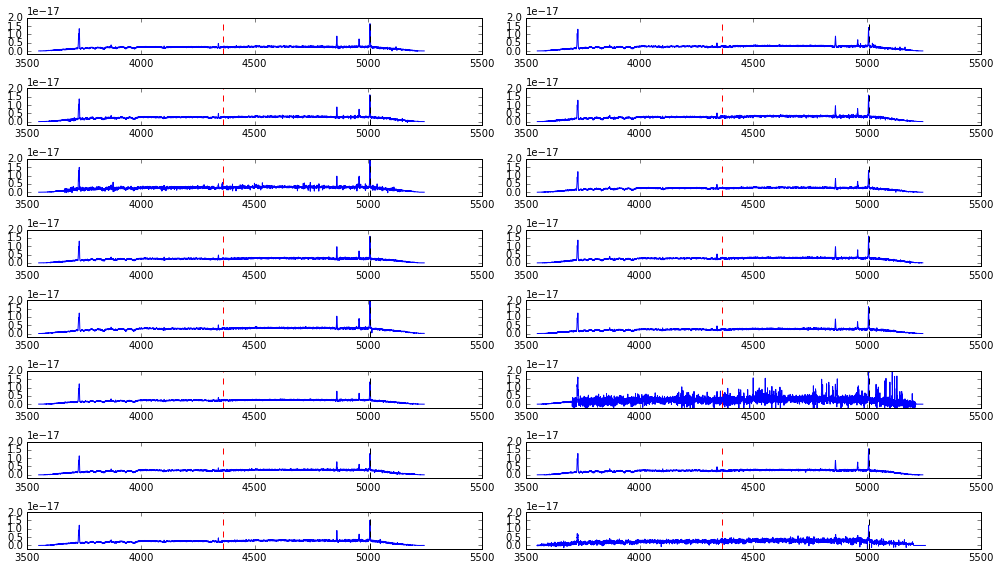

In [30]:
plt.figure(figsize=(14,8))
ind = np.where((np.isfinite(mass1)==True) & (mass1>0) & (mass1 < 1e13))[0]
mass = mass1[ind]
num_galaxies = range(len(mass))
edge, dist, flux = lib.binning(np.log10(mass), num_galaxies, 200, filename = '../DEEP2/Master_Grid.fits', spectra_plot = True)
plt.tight_layout()
plt.savefig('composite_spectra.pdf', bbox_inches = 'tight', pad_inches = 0)

In [12]:
spec_grid = np.zeros((len(edge), mgrid.shape[1]))

In [13]:
for i in range(len(edge)):
    spec_grid[i] = flux[i]

In [15]:
fits.writeto('composite_spec_mstar_200.fits', spec_grid, clobber = True)

In [36]:
sgrid = fits.open('composite_spec_mstar_200.fits')
sgrid_hdr = sgrid[0].header

In [39]:
sgrid_hdr['CRVAL1'] = 3541.29
sgrid_hdr['CDELT1'] = 0.16866575
sgrid_hdr['AS'] = 2

In [40]:
sgrid_hdr

SIMPLE  =                    T / conforms to FITS standard                      
BITPIX  =                  -64 / array data type                                
NAXIS   =                    2 / number of array dimensions                     
NAXIS1  =                10180                                                  
NAXIS2  =                   16                                                  
EXTEND  =                    T                                                  
CRVAL1  =              3541.29                                                  
CDELT1  =           0.16866575                                                  
AS      =                    2                                                  